In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Reading and understanting the data

In [2]:
bikeData= pd.read_csv('day.csv')
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikeData.shape


(730, 16)

In [4]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### dataset consists of total 730 entries and 16 columns

In [5]:
bikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- Apart from date all other dtypes are in float or int
- Some of the integer entries seems to be categorical variables

## Check for null

In [6]:
bikeData.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### There seems to be no null values in all  the columns

## Check for duplicates

In [7]:
bike_duplic= bikeData.copy()
bike_duplic.drop_duplicates(inplace=True, keep='first')

In [8]:
bike_duplic.shape

(730, 16)

#### The shape of the data set after dropping the duplicates is same as original so No duplicates found

## Removing redundant data

We can observe from the data set that the
 - instant is just an index
 - casual and registred are constituents of the cnt
 - dteday is the date which seems to not useful for our case

Hence we can drop these columns

In [9]:
bikeData.drop(['instant','casual','registered','dteday','atemp'],inplace=True, axis=1)

In [10]:
bikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


### There are variables like season ,month,weekday and weathersit which are in int type but actually are of category type so we convert them

In [11]:
bikeData.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeData.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeData.mnth = bikeData.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeData.weekday = bikeData.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,43.6957,12.522300,1600


In [12]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Creating Dummy Variables for the created catgories

In [13]:
bikeData = pd.get_dummies(bikeData,columns=['season','mnth','weekday'], drop_first=True)
bikeData = pd.get_dummies(bikeData,columns=['weathersit'])

bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   season_spring        730 non-null    uint8  
 8   season_summer        730 non-null    uint8  
 9   season_winter        730 non-null    uint8  
 10  mnth_aug             730 non-null    uint8  
 11  mnth_dec             730 non-null    uint8  
 12  mnth_feb             730 non-null    uint8  
 13  mnth_jan             730 non-null    uint8  
 14  mnth_jul             730 non-null    uint8  
 15  mnth_jun             730 non-null    uin

# EDA
#### we will analyse the continuos (numerical) data first 

In [14]:
bikeData.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [15]:
bikeNum = bikeData[['temp','hum','windspeed','cnt']]
bikeNum.head()
bikeNum.corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.128565,-0.158186,0.627044
hum,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.627044,-0.098543,-0.235132,1.000000


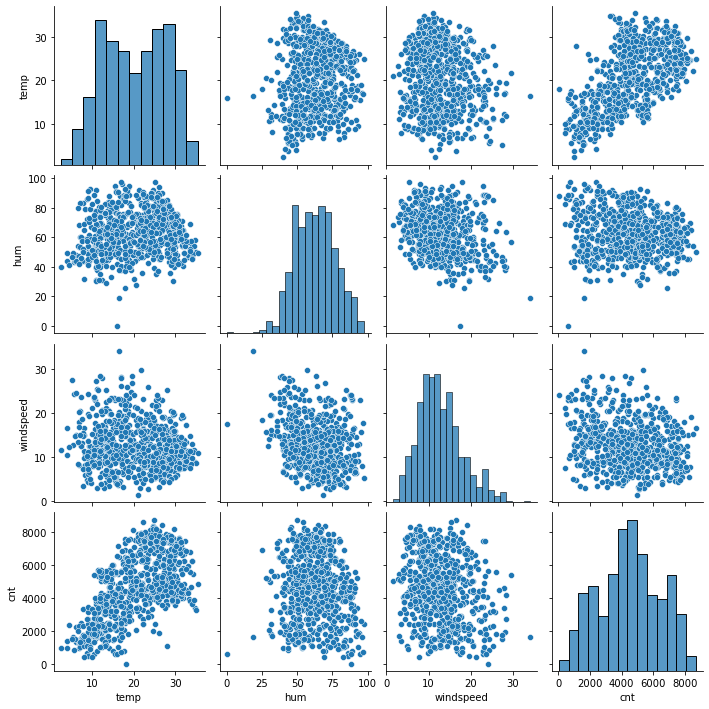

In [16]:
sns.pairplot(bikeNum)
plt.show()

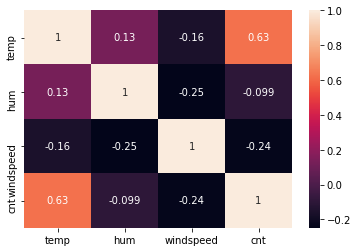

In [17]:
sns.heatmap(bikeNum.corr(),annot=True)
plt.show()

### Observations
- We can clearly observe the strong correlation between the temp and cnt


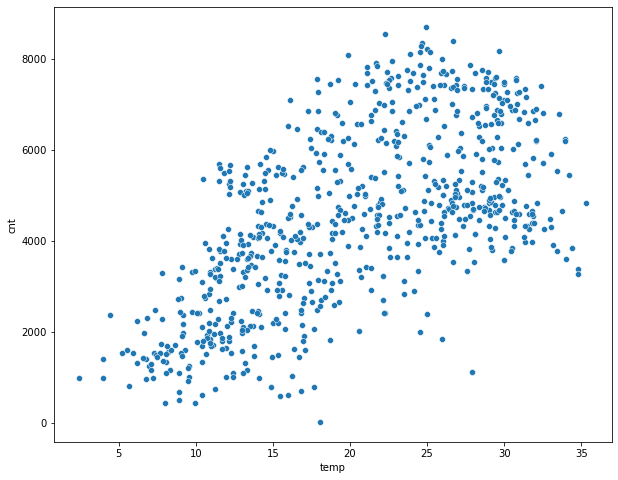

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=bikeNum, x="temp", y="cnt")
plt.show()

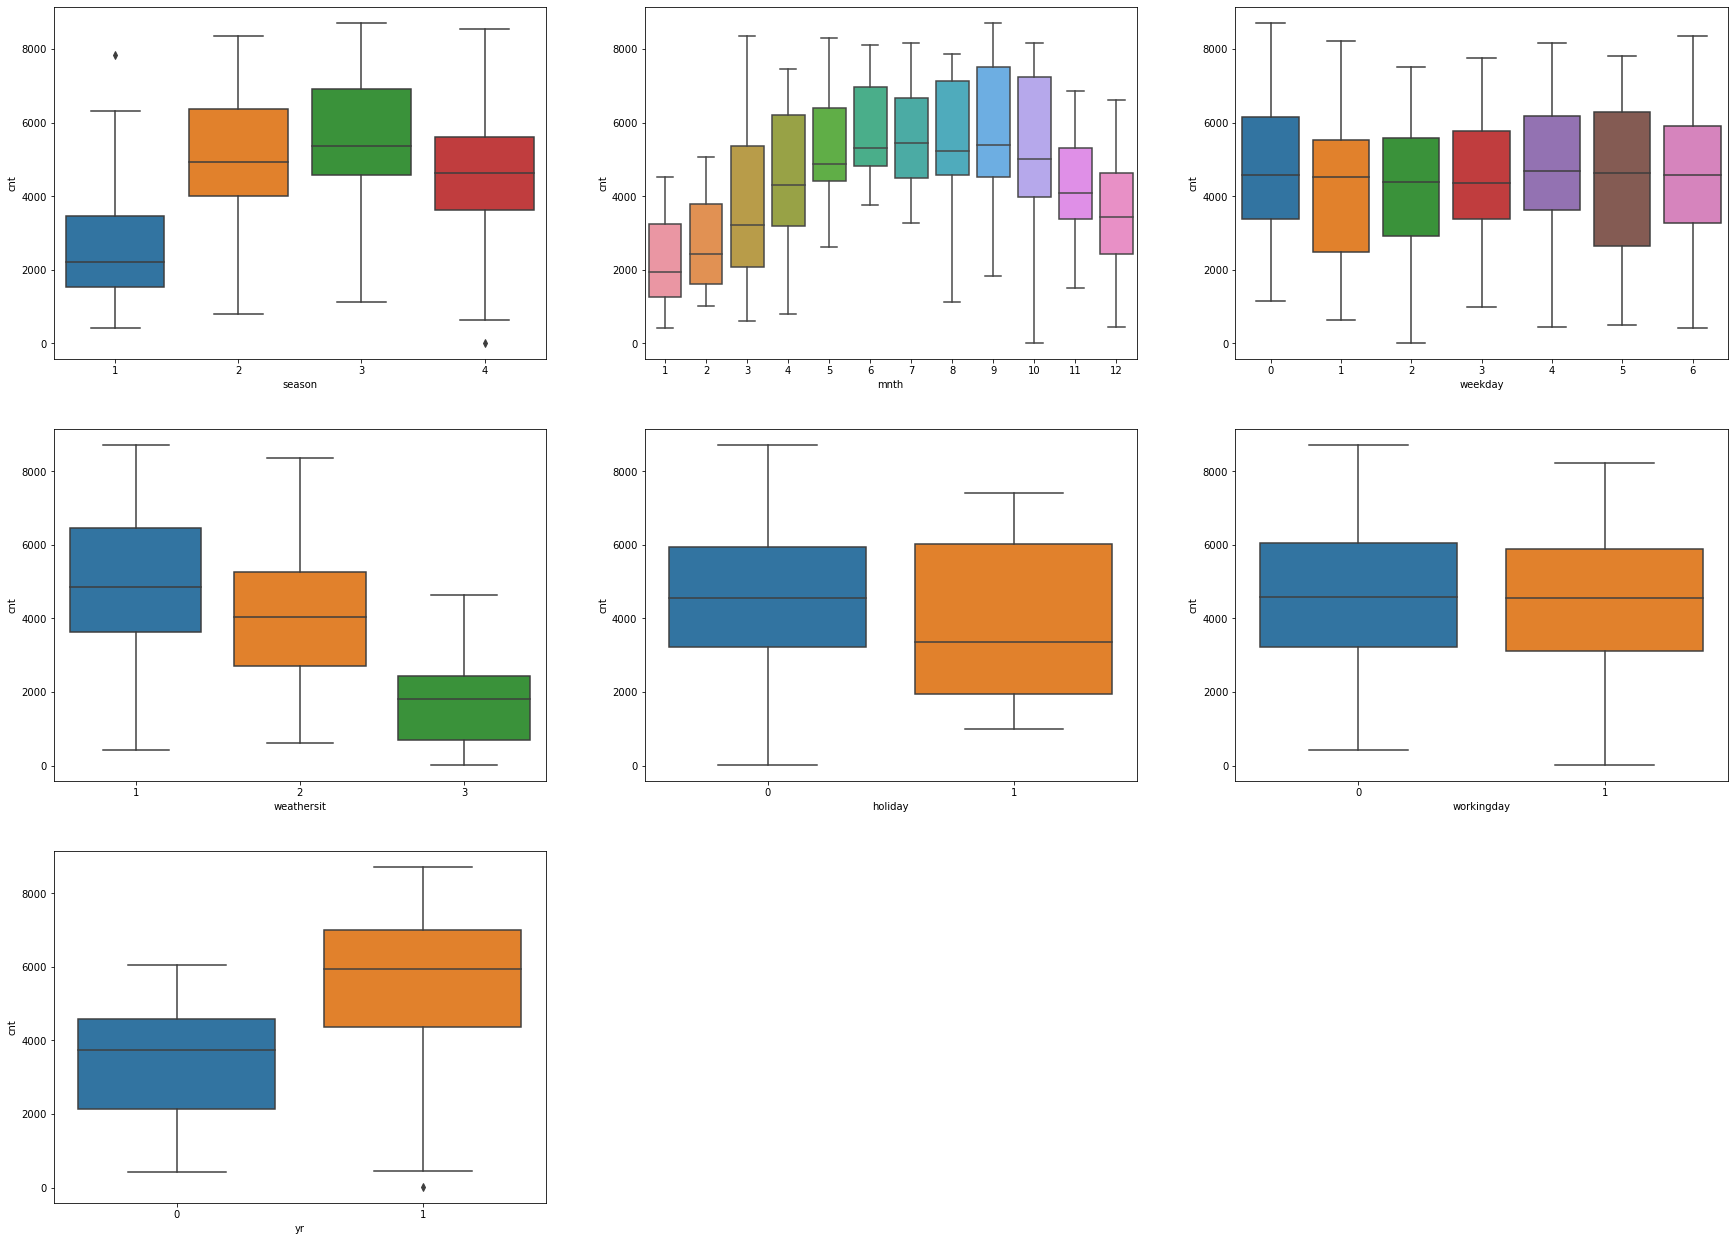

In [19]:
plt.figure(figsize=(30, 22))
category = ['season','mnth','weekday','weathersit','holiday','workingday','yr']
for i,j in enumerate(category):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = j, y = 'cnt', data = bike_duplic)
plt.show()

### From the  boxplots of categorical variables we can observe that,
 - In season value 3 ie fall has highest cnt
 - In month there is a gradual increas till september
 - We can observe the decrease in cnt as weather becomes more harsh
 - non holiday days tend to have more cnt and on holidays cnt decreases
 - the year 2019 has higher values than previous yr so we can see a positive trend here

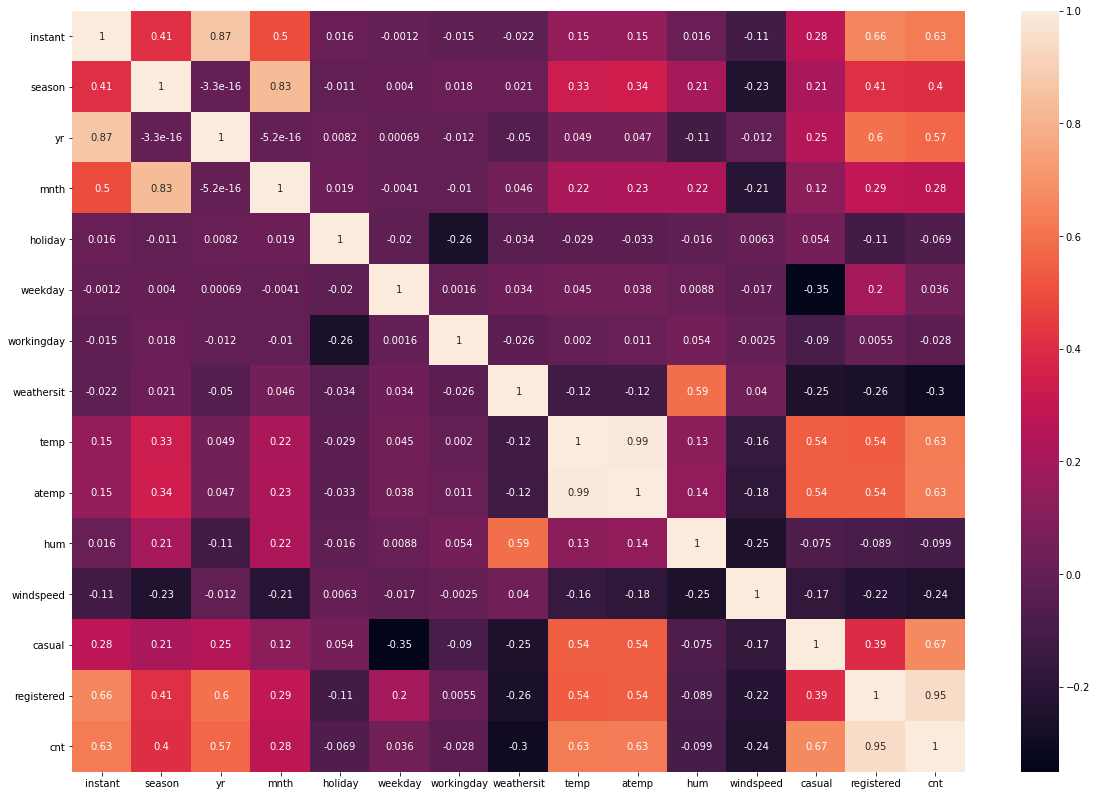

In [20]:
plt.figure(figsize=(20,14))
sns.heatmap(bike_duplic.corr(),annot=True)
plt.show()

## Splitting the DATA
Here we split the data into 70:30 ratio as train and test dataset
using the test train split method from sklearn

In [21]:
from sklearn.model_selection import train_test_split

# target variable 
np.random.seed(0)


bikeData_train,bikeData_test = train_test_split(bikeData,train_size=0.70,random_state=324)

In [22]:
bikeData_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
232,0,0,1,29.144153,77.0000,16.666518,3873,0,0,0,...,0,0,0,0,0,1,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,1,0,0,0,0,0,0,1,0
256,0,0,1,27.606653,69.7083,11.209100,4785,0,0,0,...,1,0,0,0,0,0,0,0,1,0
597,1,0,1,26.615847,67.3750,4.875644,7006,0,0,0,...,0,0,0,0,0,0,1,0,1,0
283,0,0,1,23.233347,80.8750,9.583814,4563,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [23]:
bikeData_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
232,0,0,1,29.144153,77.0000,16.666518,3873,0,0,0,...,0,0,0,0,0,1,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,1,0,0,0,0,0,0,1,0
256,0,0,1,27.606653,69.7083,11.209100,4785,0,0,0,...,1,0,0,0,0,0,0,0,1,0
597,1,0,1,26.615847,67.3750,4.875644,7006,0,0,0,...,0,0,0,0,0,0,1,0,1,0
283,0,0,1,23.233347,80.8750,9.583814,4563,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [24]:
bikeData_test.shape

(220, 30)

In [25]:
bikeData.shape

(730, 30)

In [26]:
print(bikeData_train.shape)
print(bikeData_test.shape)

(510, 30)
(220, 30)


In [27]:
bikeData_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
232,0,0,1,29.144153,77.0000,16.666518,3873,0,0,0,...,0,0,0,0,0,1,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,1,0,0,0,0,0,0,1,0
256,0,0,1,27.606653,69.7083,11.209100,4785,0,0,0,...,1,0,0,0,0,0,0,0,1,0
597,1,0,1,26.615847,67.3750,4.875644,7006,0,0,0,...,0,0,0,0,0,0,1,0,1,0
283,0,0,1,23.233347,80.8750,9.583814,4563,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## Scaling continuous variables
To make all features in same scale to interpret easily
these continuous variables are scaled ['temp','atemp','hum','windspeed']

In [28]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
numvar=['temp','hum','windspeed','cnt']
bikeData_train[numvar]=scalar.fit_transform(bikeData_train[numvar])


In [29]:
bikeData_train.shape

(510, 30)

In [30]:
bikeData_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
232,0,0,1,0.802645,0.793473,0.443826,0.443051,0,0,0,...,0,0,0,0,0,1,0,0,1,0
728,1,0,1,0.207310,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,0,0,0,0,1,0
256,0,0,1,0.753578,0.718333,0.268716,0.547975,0,0,0,...,1,0,0,0,0,0,0,0,1,0
597,1,0,1,0.721959,0.694289,0.065497,0.803497,0,0,0,...,0,0,0,0,0,0,1,0,1,0
283,0,0,1,0.614014,0.833405,0.216566,0.522434,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## Build Linear Regression Model

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

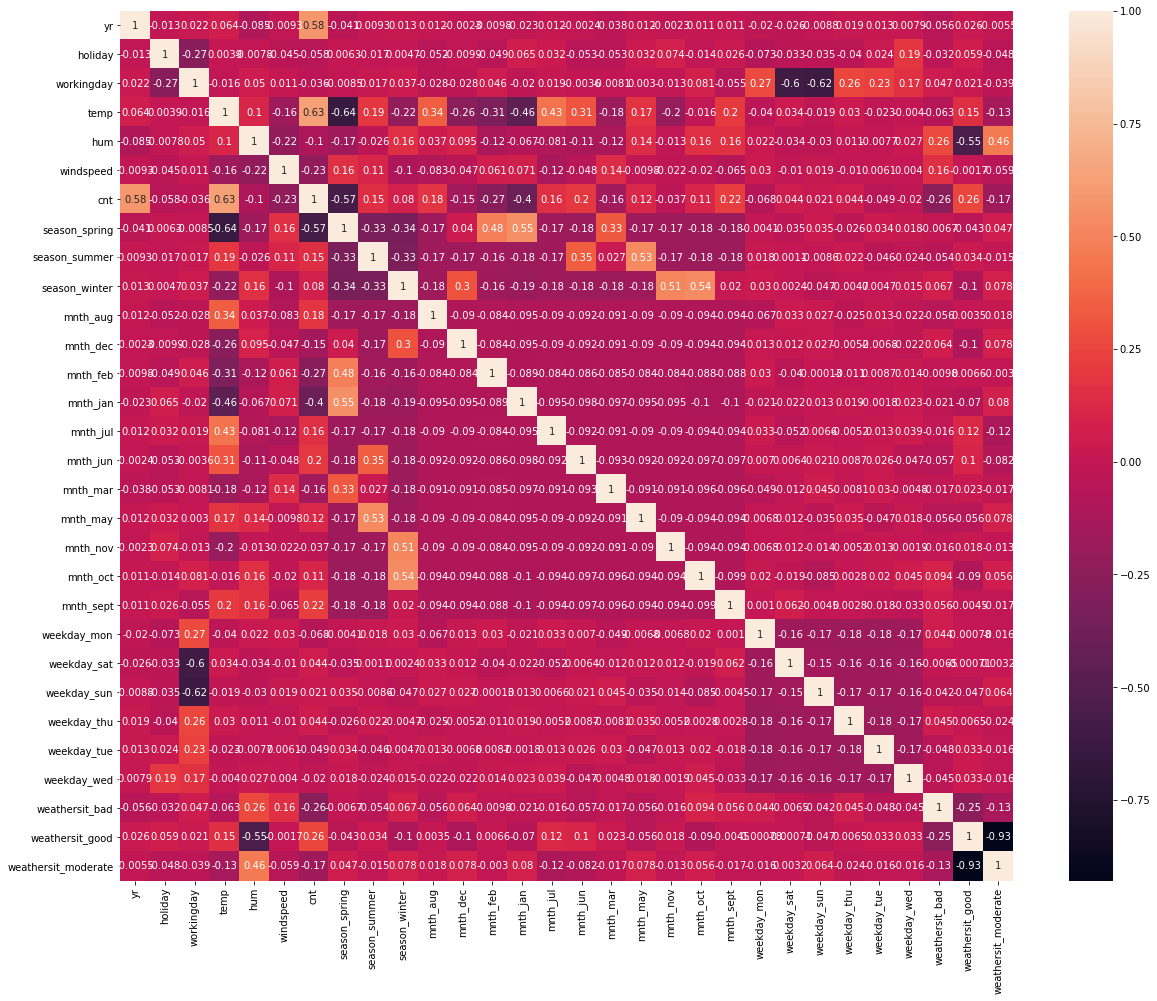

In [32]:
# check the correlation between the dataset
plt.figure(figsize=(20,16))
sns.heatmap(bikeData_train.corr(),annot=True)
plt.show()

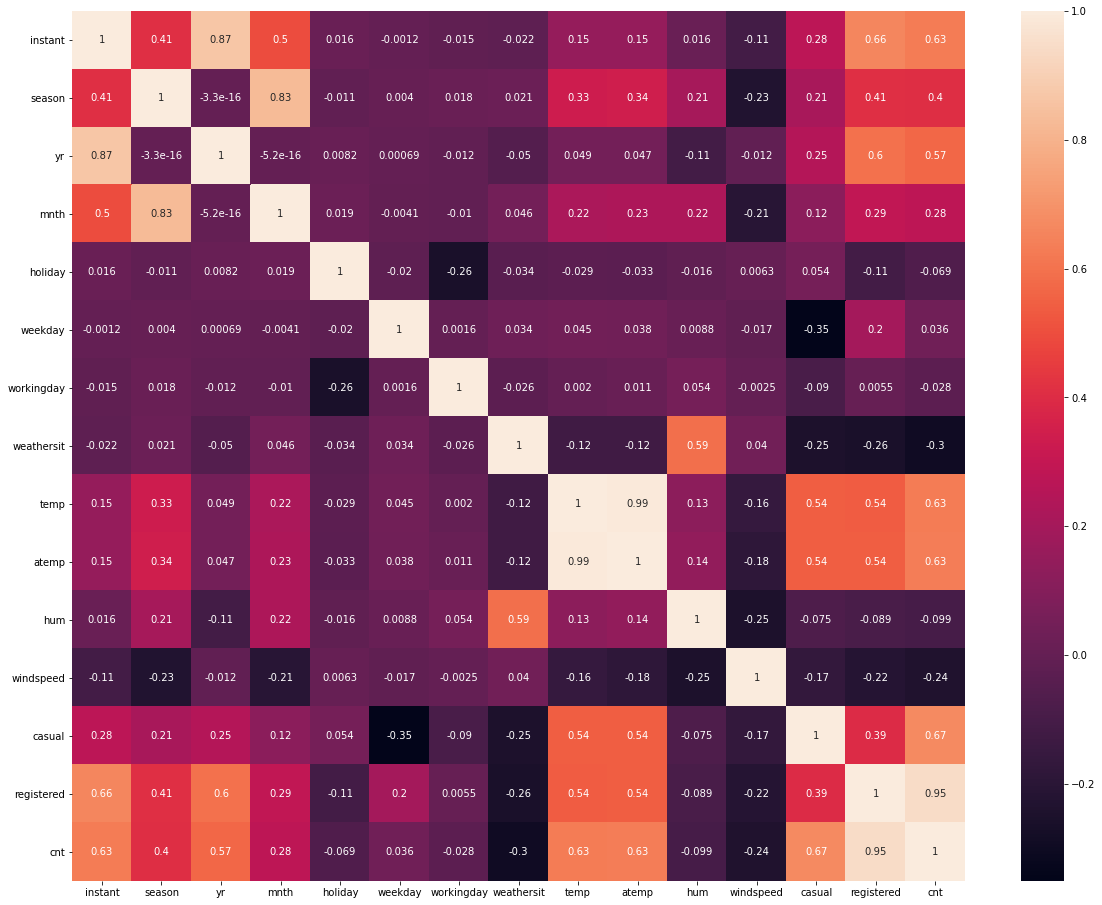

In [33]:
plt.figure(figsize=(20,16))
sns.heatmap(bike_duplic.corr(),annot=True)
plt.show()

In [34]:
import statsmodels.api as sm


In [35]:
y_train = bikeData_train.pop('cnt')
X_train = bikeData_train

In [36]:
X_train.shape

(510, 29)

### Let us test with all the variables

In [37]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 4),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 8),
 ('weekday_sun', False, 13),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 3),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [40]:
# Creating new dataset with RFE selected variables
X_train_rfe = X_train[col]


## Building Linear Model using 'STATS MODEL'


## VIF

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_good,40.62
14,weathersit_moderate,26.35
12,weathersit_bad,4.27
2,temp,3.73
5,season_spring,3.03
6,season_winter,2.25
3,hum,1.81
10,mnth_nov,1.65
8,mnth_jan,1.61
7,mnth_dec,1.39


## Model 1

In [43]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     198.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.92e-192
Time:                        08:12:40   Log-Likelihood:                 509.27
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     495   BIC:                            -925.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2229      0.027      8.225      0.000       0.170       0.276
yr                      0.2382      0.008     29.419      0.000       0.222       0.254
holiday                -0.0806      0.024     -3.357      0.001      -0.128      -0.033
temp                    0.4221      0.032     13.135      0.000       0.359       0.485
hum                    -0.1864      0.036     -5.107      0.000      -0.258      -0.115
windspeed              -0.1541      0.026     -5.901      0.000      -0.205      -0.103
season_spring          -0.1072      0.016     -6.672      0.000      -0.139      -0.076
season_winter           0.0826      0.014      5.998      0.000       0.056       0.110
mnth_dec               -0.0454      0.017     -2.638      0.009      -0.079      -0.012
mnth_jan               -0.0366      0.018     -2.082      0.038      -0.071      -0.002
mnth_jul               -0.0752      0.017     -4.420      0.000      -0.109      -0.042
mnth_nov               -0.0638      0.019     -3.402      0.001      -0.101      -0.027
mnth_sept               0.0651      0.015      4.370      0.000       0.036       0.094
weathersit_bad         -0.0689      0.022     -3.192      0.002      -0.111      -0.026
weathersit_good         0.1674      0.009     17.711      0.000       0.149       0.186
weathersit_moderate     0.1244      0.012     10.618      0.000       0.101       0.147
==============================================================================
Omnibus:                       82.407   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.323
Skew:                          -0.772   Prob(JB):                     1.77e-52
Kurtosis:                       5.972   Cond. No.                     4.97e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.72e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
lr1.params

const                  0.222908
yr                     0.238228
holiday               -0.080564
temp                   0.422080
hum                   -0.186386
windspeed             -0.154090
season_spring         -0.107232
season_winter          0.082644
mnth_dec              -0.045408
mnth_jan              -0.036637
mnth_jul              -0.075210
mnth_nov              -0.063771
mnth_sept              0.065138
weathersit_bad        -0.068880
weathersit_good        0.167423
weathersit_moderate    0.124366
dtype: float64

In [45]:
def buildModel(dataset):
    # Add a constant
    X_train_lm = sm.add_constant(dataset)
    # Create a fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())
    return lr

In [46]:
def getVif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return vif

### Dropping weathersit_good which has high  VIF

In [47]:
X_train_new = X_train_rfe.drop(["weathersit_good"], axis = 1)


## Model 2

In [48]:
l2=buildModel(X_train_new)
# l2

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     198.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.92e-192
Time:                        08:12:40   Log-Likelihood:                 509.27
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     495   BIC:                            -925.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3903    

In [49]:
vif2=getVif(X_train_new)

               Features    VIF
3                   hum  21.89
2                  temp  14.93
4             windspeed   4.22
5         season_spring   3.03
6         season_winter   2.79
13  weathersit_moderate   2.15
0                    yr   2.01
10             mnth_nov   1.75
8              mnth_jan   1.74
7              mnth_dec   1.49
9              mnth_jul   1.48
12       weathersit_bad   1.28
11            mnth_sept   1.24
1               holiday   1.05


In [50]:
X_train_new = X_train_new.drop(["hum"], axis = 1)


## Model 3

In [51]:
l3=buildModel(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.14e-188
Time:                        08:12:40   Log-Likelihood:                 496.18
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     496   BIC:                            -905.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2865    

In [52]:
getVif(X_train_new)

               Features   VIF
2                  temp  4.70
3             windspeed  4.20
5         season_winter  2.42
4         season_spring  2.31
0                    yr  2.01
9              mnth_nov  1.71
7              mnth_jan  1.67
12  weathersit_moderate  1.53
6              mnth_dec  1.42
8              mnth_jul  1.42
10            mnth_sept  1.23
11       weathersit_bad  1.11
1               holiday  1.05


,Features,VIF
2,temp,4.70
3,windspeed,4.20
5,season_winter,2.42
4,season_spring,2.31
0,yr,2.01
9,mnth_nov,1.71
7,mnth_jan,1.67
12,weathersit_moderate,1.53
6,mnth_dec,1.42
8,mnth_jul,1.42


### As we know that there is a strong relation between temp and cnt so will drop the next value with high vif

In [53]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)


## Model 4

In [54]:
l4=buildModel(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.5
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          9.53e-185
Time:                        08:12:40   Log-Likelihood:                 485.41
No. Observations:                 510   AIC:                            -944.8
Df Residuals:                     497   BIC:                            -889.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2360    

In [55]:
getVif(X_train_new)

               Features   VIF
2                  temp  2.87
4         season_winter  2.40
0                    yr  2.00
3         season_spring  1.93
8              mnth_nov  1.69
6              mnth_jan  1.66
11  weathersit_moderate  1.53
5              mnth_dec  1.42
7              mnth_jul  1.38
9             mnth_sept  1.23
10       weathersit_bad  1.06
1               holiday  1.05


,Features,VIF
2,temp,2.87
4,season_winter,2.40
0,yr,2.00
3,season_spring,1.93
8,mnth_nov,1.69
6,mnth_jan,1.66
11,weathersit_moderate,1.53
5,mnth_dec,1.42
7,mnth_jul,1.38
9,mnth_sept,1.23


In [56]:
X_train_new = X_train_new.drop(["mnth_jan"], axis = 1)


## Model 5

In [57]:
l5=buildModel(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          5.14e-185
Time:                        08:12:40   Log-Likelihood:                 483.23
No. Observations:                 510   AIC:                            -942.5
Df Residuals:                     498   BIC:                            -891.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2244    

In [58]:
getVif(X_train_new)

               Features   VIF
2                  temp  2.82
4         season_winter  2.38
0                    yr  1.99
7              mnth_nov  1.68
10  weathersit_moderate  1.51
5              mnth_dec  1.38
6              mnth_jul  1.37
3         season_spring  1.31
8             mnth_sept  1.23
9        weathersit_bad  1.06
1               holiday  1.04


,Features,VIF
2,temp,2.82
4,season_winter,2.38
0,yr,1.99
7,mnth_nov,1.68
10,weathersit_moderate,1.51
5,mnth_dec,1.38
6,mnth_jul,1.37
3,season_spring,1.31
8,mnth_sept,1.23
9,weathersit_bad,1.06


In [59]:
X_train_new = X_train_new.drop(["mnth_dec"], axis = 1)


In [60]:
l6=buildModel(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.7
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          3.33e-185
Time:                        08:12:40   Log-Likelihood:                 480.83
No. Observations:                 510   AIC:                            -939.7
Df Residuals:                     499   BIC:                            -893.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2148    

In [61]:
getVif(X_train_new)

              Features   VIF
2                 temp  2.81
0                   yr  1.99
4        season_winter  1.90
6             mnth_nov  1.52
9  weathersit_moderate  1.50
5             mnth_jul  1.37
3        season_spring  1.27
7            mnth_sept  1.22
8       weathersit_bad  1.06
1              holiday  1.04


,Features,VIF
2,temp,2.81
0,yr,1.99
4,season_winter,1.90
6,mnth_nov,1.52
9,weathersit_moderate,1.50
5,mnth_jul,1.37
3,season_spring,1.27
7,mnth_sept,1.22
8,weathersit_bad,1.06
1,holiday,1.04


In [63]:
l6.params


const                  0.214780
yr                     0.241667
holiday               -0.084685
temp                   0.440049
season_spring         -0.112415
season_winter          0.074122
mnth_jul              -0.063220
mnth_nov              -0.044228
mnth_sept              0.063305
weathersit_bad        -0.308212
weathersit_moderate   -0.071364
dtype: float64

## Now The Model looks good as there is less collinearity between the variables and p values are also significant

### The coefficients :

 - const                  0.214780
 - yr                     0.241667
 - holiday               -0.084685
 - temp                   0.440049
 - season_spring         -0.112415
 - season_winter          0.074122
 - mnth_jul              -0.063220
 - mnth_nov              -0.044228
 - mnth_sept              0.063305
 - weathersit_bad        -0.308212
 - weathersit_moderate   -0.071364

### Model parameters :
 - R-squared:                       0.831
 - Adj. R-squared:                  0.827
 - F-statistic:                     244.7
 - Prob (F-statistic):          3.33e-185
 
#### The F-Statistics value of 244.7 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

## The Final Equation can be given as,

cnt =  0.214780 + (yr × 0.241667) + (holiday x -0.084685) + (temp × 0.440049) + (season_spring x -0.112415) + (season_winter x 0.074122) + (mnth_jul x -0.063220) + (mnth_nov x -0.044228) + (mnth_sep x 0.063305) + (weathersit_bad  x -0.308212) +(weathersit_moderate x  -0.071364)

### The coefficients on each of the parameters indicate the amount in which the target cnt will increase or decrease when thers is a unit increase in the variable values.

## Residual analysis

In [64]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'season_spring', 'season_winter', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_moderate'],
      dtype='object')

In [65]:
cols=['yr', 'holiday', 'temp', 'season_spring', 'season_winter', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_moderate']

In [66]:
X_train_lm6 = sm.add_constant(X_train_new)
    # Create a fitted model
lr7 = sm.OLS(y_train, X_train_lm6).fit()


In [67]:
lr7.params

const                  0.214780
yr                     0.241667
holiday               -0.084685
temp                   0.440049
season_spring         -0.112415
season_winter          0.074122
mnth_jul              -0.063220
mnth_nov              -0.044228
mnth_sept              0.063305
weathersit_bad        -0.308212
weathersit_moderate   -0.071364
dtype: float64

In [246]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.7
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          3.33e-185
Time:                        08:11:30   Log-Likelihood:                 480.83
No. Observations:                 510   AIC:                            -939.7
Df Residuals:                     499   BIC:                            -893.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2148      0.022      9.615      0.000       0.171       0.259
yr                      0.2417      0.008     28.511      0.000       0.225       0.258
holiday                -0.0847      0.025     -3.368      0.001      -0.134      -0.035
temp                    0.4400      0.031     14.123      0.000       0.379       0.501
season_spring          -0.1124      0.017     -6.806      0.000      -0.145      -0.080
season_winter           0.0741      0.014      5.435      0.000       0.047       0.101
mnth_jul               -0.0632      0.018     -3.597      0.000      -0.098      -0.029
mnth_nov               -0.0442      0.018     -2.401      0.017      -0.080      -0.008
mnth_sept               0.0633      0.016      4.081      0.000       0.033       0.094
weathersit_bad         -0.3082      0.024    -12.825      0.000      -0.355      -0.261
weathersit_moderate    -0.0714      0.009     -7.736      0.000      -0.089      -0.053
==============================================================================
Omnibus:                       79.660   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.282
Skew:                          -0.760   Prob(JB):                     8.90e-49
Kurtosis:                       5.847   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
y_train_pred = lr7.predict(X_train_lm6)


Text(0.5, 0, 'Errors')

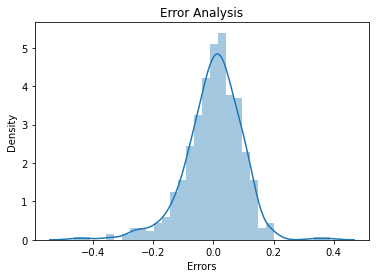

In [248]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Analysis')
plt.xlabel('Errors')

#### From the figure its clear that it is a normal distribution so we can conclude that this is a valid Linear Regression.

In [69]:
getVif(X_train_new)


              Features   VIF
2                 temp  2.81
0                   yr  1.99
4        season_winter  1.90
6             mnth_nov  1.52
9  weathersit_moderate  1.50
5             mnth_jul  1.37
3        season_spring  1.27
7            mnth_sept  1.22
8       weathersit_bad  1.06
1              holiday  1.04


,Features,VIF
2,temp,2.81
0,yr,1.99
4,season_winter,1.90
6,mnth_nov,1.52
9,weathersit_moderate,1.50
5,mnth_jul,1.37
3,season_spring,1.27
7,mnth_sept,1.22
8,weathersit_bad,1.06
1,holiday,1.04


#### As we can see from the above values there is no multicollinearity between the variables.

## Testing on the final test data to evaluate the Model

In [70]:
numvar=['temp','hum','windspeed','cnt']
bikeData_test[numvar]=scalar.transform(bikeData_test[numvar])


In [71]:
bikeData_test.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
144,0,0,1,0.737223,0.717475,0.240625,0.570179,0,1,0,...,0,0,0,0,0,0,0,0,1,0
351,0,0,1,0.184412,0.604122,0.274046,0.277151,0,0,1,...,0,0,0,0,0,1,0,0,1,0
201,0,0,0,0.938940,0.712323,0.386356,0.432812,0,0,0,...,0,0,1,0,0,0,0,0,0,1
341,0,0,0,0.220394,0.597681,0.425132,0.379659,0,0,1,...,0,0,1,0,0,0,0,0,1,0
425,1,0,0,0.334881,0.677114,0.220569,0.364933,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [72]:
bikeData_test.describe()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.490909,0.027273,0.645455,0.516299,0.642763,0.315273,0.511726,0.236364,0.277273,0.218182,...,0.063636,0.127273,0.172727,0.159091,0.127273,0.127273,0.136364,0.018182,0.627273,0.354545
std,0.501057,0.163248,0.479466,0.236939,0.143928,0.167035,0.207331,0.425817,0.448673,0.413953,...,0.244661,0.334038,0.378873,0.366595,0.334038,0.334038,0.343957,0.133913,0.484633,0.479466
min,0.000000,0.000000,0.000000,-0.050062,0.298841,-0.042808,0.110331,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.311167,0.537247,0.197521,0.378221,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.490803,0.644697,0.302119,0.505637,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732316,0.740876,0.402718,0.668086,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.982553,1.002146,0.858328,0.959503,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
y_test = bikeData_test.pop('cnt')
X_test = bikeData_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 144 to 689
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   220 non-null    int64  
 1   holiday              220 non-null    int64  
 2   workingday           220 non-null    int64  
 3   temp                 220 non-null    float64
 4   hum                  220 non-null    float64
 5   windspeed            220 non-null    float64
 6   season_spring        220 non-null    uint8  
 7   season_summer        220 non-null    uint8  
 8   season_winter        220 non-null    uint8  
 9   mnth_aug             220 non-null    uint8  
 10  mnth_dec             220 non-null    uint8  
 11  mnth_feb             220 non-null    uint8  
 12  mnth_jan             220 non-null    uint8  
 13  mnth_jul             220 non-null    uint8  
 14  mnth_jun             220 non-null    uint8  
 15  mnth_mar             220 non-null    u

In [74]:
cols=X_train_new.columns
X_test=X_test[cols]

In [75]:
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 144 to 689
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                220 non-null    float64
 1   yr                   220 non-null    int64  
 2   holiday              220 non-null    int64  
 3   temp                 220 non-null    float64
 4   season_spring        220 non-null    uint8  
 5   season_winter        220 non-null    uint8  
 6   mnth_jul             220 non-null    uint8  
 7   mnth_nov             220 non-null    uint8  
 8   mnth_sept            220 non-null    uint8  
 9   weathersit_bad       220 non-null    uint8  
 10  weathersit_moderate  220 non-null    uint8  
dtypes: float64(2), int64(2), uint8(7)
memory usage: 10.1 KB


In [76]:
y_pred_test = lr7.predict(X_test_lm6)


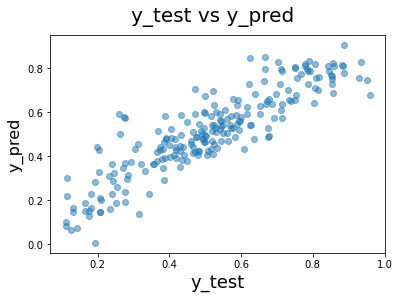

In [77]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### R^2 score test

In [78]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred_test)
r2

0.7902269093147312

In [79]:
n =X_test.shape[0]
n

220

In [80]:
p= X_test.shape[1]
p

10

In [81]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7801899193297901

## Evaluation from the test data

- Train
     - r^2 score       0.817
     - adjusted r2     0.813
- Test
     - r^2 score       0.7902
     - adjusted r2     0.78018

## This seems to be very good model with over 80% Rscore

The coefficients :
 - const 0.214780
 - yr 0.241667
 - holiday -0.084685
 - temp 0.440049
 - season_spring -0.112415
 - season_winter 0.074122
 - mnth_jul -0.063220
 - mnth_nov -0.044228
 - mnth_sept 0.063305
 - weathersit_bad -0.308212
 - weathersit_moderate -0.071364  

### As we can observe from the coefficients of diffrent variable,
#### Mainly 3 predictors dominate the model
 - temp           - which has an coefficient of  0.440049, ie when a unit increase in temperature will increase the                         count by 0.440049 units.
 - yr             - which has an coefficient of  0.241667, ie when a unit increase in the yr will increase the                               count by 0.241667 units.
 - weathersit_bad - which has an coefficient of  -0.308212, ie when a unit increase in bad weather conditions, will                           decrease the count by -0.308212 units.